In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

#import cv2


from matplotlib import pyplot as plt

import math

import random 

from keras.layers import Input, Flatten, Dense
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D

from keras.models import Model
from keras.optimizers import Adam

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


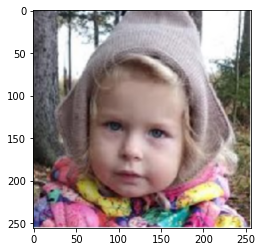

In [2]:
from skimage.io import imread

#-----------------------------------------------------------------------------------------------------
def GenerateInputFrame(code):
    if code ==0: i_path = 'aglaya.jpg'
    if code ==1: i_path = 'aglaya1.jpg'
    if code ==2: i_path = 'aglaya2.jpg'
    c_img = imread(i_path)
    frame = c_img.copy()
    return frame
#-----------------------------------------------------------------------------------------------------
def MakeBatch(batch_size):
    X = np.zeros((batch_size, 256, 256, 3))
    Y = np.zeros((batch_size, 256, 256, 3))
    for ib in range (0, batch_size):
        cd = np.random.randint(0,3)
        X[ib,:,:,:] = GenerateInputFrame(cd)/255
        Y[ib,:,:,:] = GenerateInputFrame(cd)/255
    return X,Y
#-----------------------------------------------------------------------------------------------------

# Generator function 
def Generator(batch_size):
    while True:
        X, Y = MakeBatch(batch_size)
        yield X, Y
#-----------------------------------------------------------------------------------------------------

X,Y = MakeBatch(10)   
         
plt.imshow(X[9,:,:], interpolation = 'bicubic')

plt.show()
        
    
            
       


In [8]:
#-------------------------------  Model ----------------------------------------

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(256, 256, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer='adadelta', loss='mean_squared_logarithmic_error')
autoencoder.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 256, 256, 128)     3584      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 32, 128)       0         
__________

Epoch:  0
Epoch 1/1
500/500 [==============================] - 266s 533ms/step - loss: 3.7464e-04


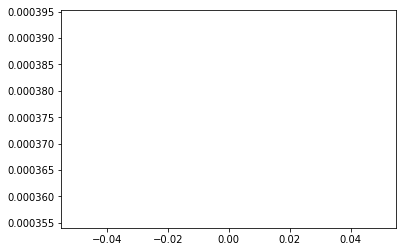

Epoch:  1
Epoch 1/1
500/500 [==============================] - 271s 541ms/step - loss: 3.4796e-04


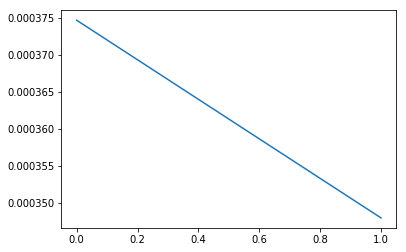

Epoch:  2
Epoch 1/1
500/500 [==============================] - 271s 542ms/step - loss: 3.5854e-04


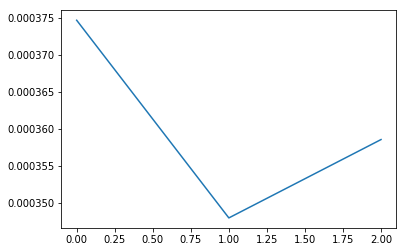

Epoch:  3
Epoch 1/1
500/500 [==============================] - 271s 542ms/step - loss: 3.5515e-04


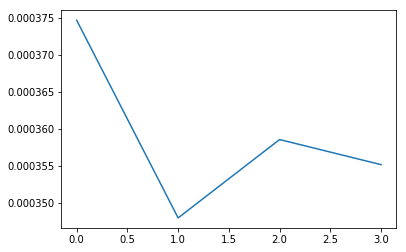

Epoch:  4
Epoch 1/1
500/500 [==============================] - 271s 542ms/step - loss: 3.4690e-04


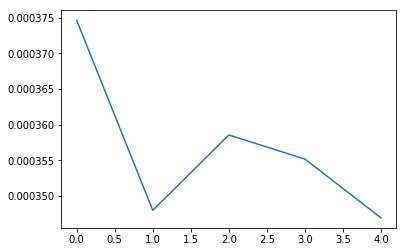

Epoch:  5
Epoch 1/1
500/500 [==============================] - 271s 542ms/step - loss: 3.2923e-04


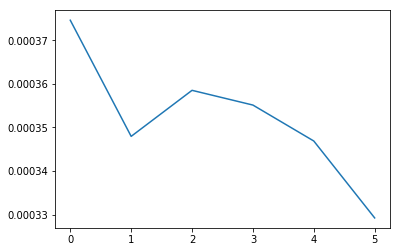

Epoch:  6
Epoch 1/1
500/500 [==============================] - 272s 543ms/step - loss: 3.3983e-04


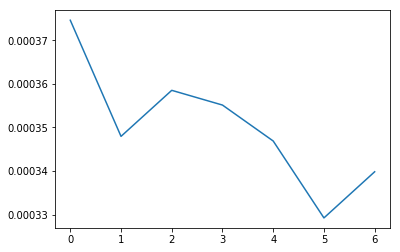

Epoch:  7
Epoch 1/1
500/500 [==============================] - 271s 542ms/step - loss: 3.1979e-04


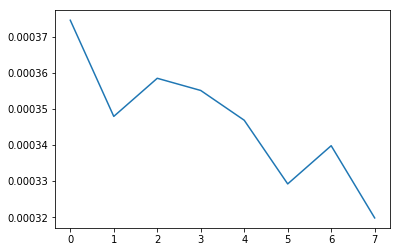

Epoch:  8
Epoch 1/1
500/500 [==============================] - 271s 542ms/step - loss: 3.0533e-04


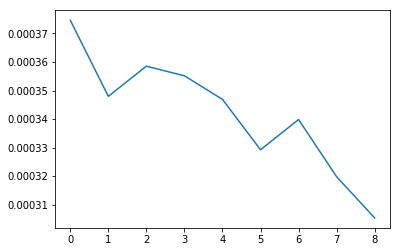

Epoch:  9
Epoch 1/1
500/500 [==============================] - 271s 541ms/step - loss: 3.0869e-04


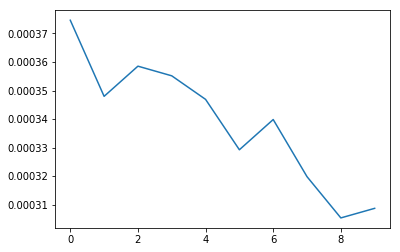

Epoch:  10
Epoch 1/1
500/500 [==============================] - 272s 543ms/step - loss: 3.0880e-04


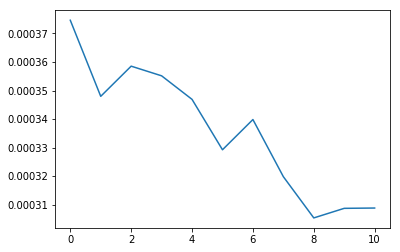

Epoch:  11
Epoch 1/1
500/500 [==============================] - 271s 543ms/step - loss: 2.9544e-04


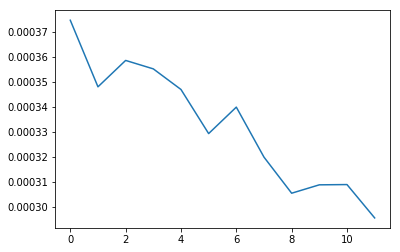

Epoch:  12
Epoch 1/1
500/500 [==============================] - 271s 543ms/step - loss: 3.0809e-04


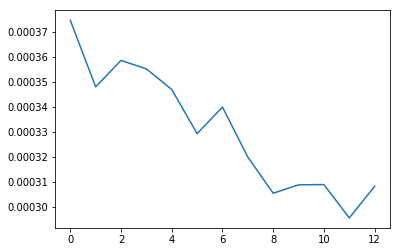

Epoch:  13
Epoch 1/1
500/500 [==============================] - 272s 543ms/step - loss: 2.9523e-04


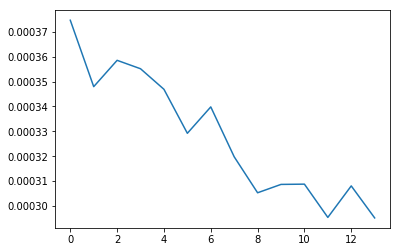

Epoch:  14
Epoch 1/1
500/500 [==============================] - 271s 543ms/step - loss: 2.8134e-04


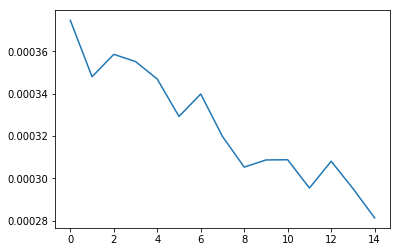

Epoch:  15
Epoch 1/1
500/500 [==============================] - 272s 543ms/step - loss: 2.7956e-04


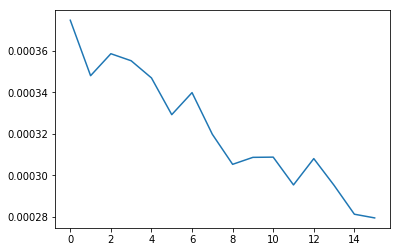

Epoch:  16
Epoch 1/1
500/500 [==============================] - 271s 543ms/step - loss: 2.8909e-04


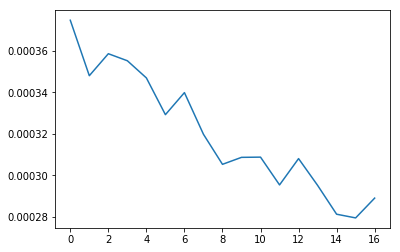

Epoch:  17
Epoch 1/1
500/500 [==============================] - 272s 543ms/step - loss: 2.8464e-04


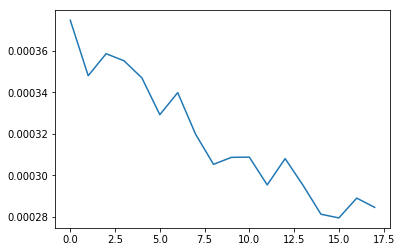

Epoch:  18
Epoch 1/1
500/500 [==============================] - 271s 542ms/step - loss: 2.6656e-04


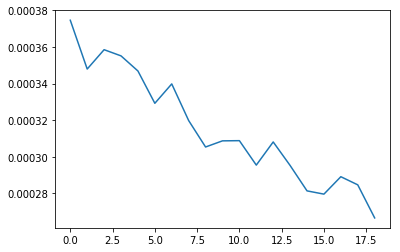

Epoch:  19
Epoch 1/1
500/500 [==============================] - 272s 543ms/step - loss: 2.5717e-04


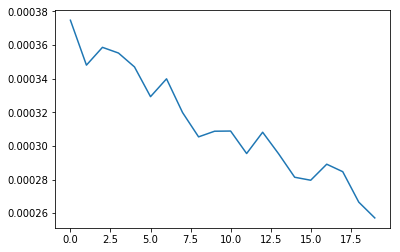

Epoch:  20
Epoch 1/1
500/500 [==============================] - 271s 542ms/step - loss: 2.7628e-04


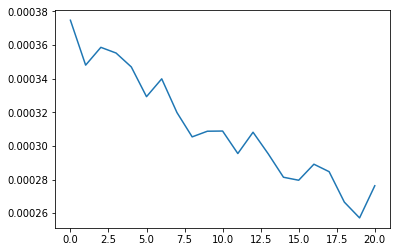

Epoch:  21
Epoch 1/1
 20/500 [>.............................] - ETA: 4:21 - loss: 2.2453e-04

KeyboardInterrupt: 

In [14]:
EPOCHS = 200
loss_list = []
for i in range (0,EPOCHS):
    print("Epoch: ",i)
    results = autoencoder.fit_generator(Generator(batch_size = 10), steps_per_epoch = 500, epochs = 1)
    loss_list.append(results.history['loss'])
    plt.plot(loss_list, label = 'loss')
    plt.show()


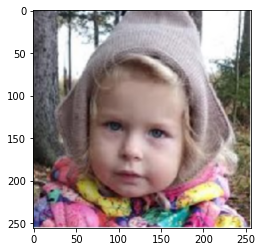

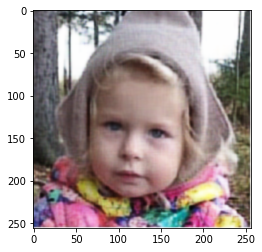

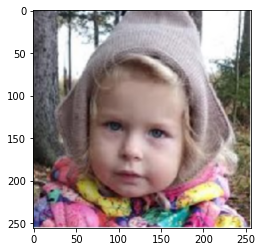

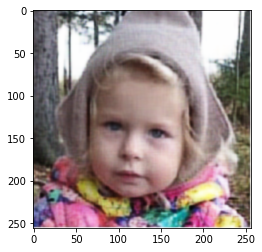

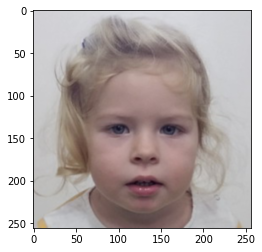

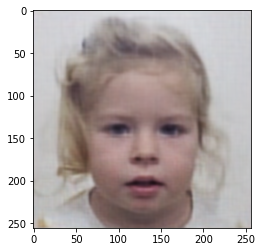

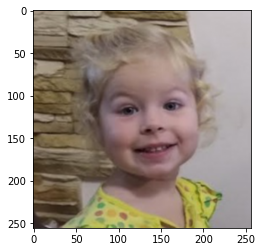

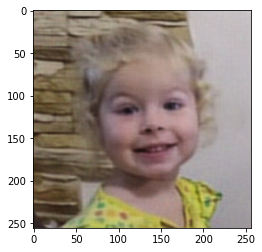

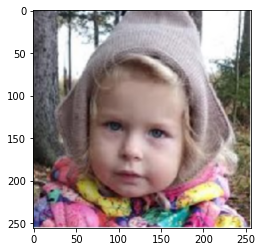

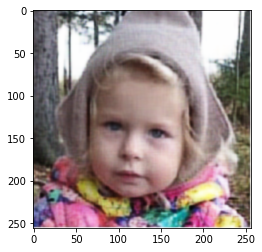

In [15]:


X,Y = MakeBatch(5)   
predictions = autoencoder.predict(X) 

for i in range(0,5):
    plt.imshow(X[i,:,:], cmap = 'gray', interpolation = 'bicubic')
    plt.show()
    plt.imshow(predictions[i,:,:], cmap = 'gray', interpolation = 'bicubic')
    plt.show()

In [16]:
#Saving weights
autoencoder.save_weights('AutoencoderPhoto3.hdf5')